# In Class Notebook, Week 07

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_spring2021/blob/master/week07/inClass_week07.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

## Start off with bqplot

In [23]:
import bqplot
# for later:
import geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 1. Data shape data (data/axis)
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# 2. Scales
sc_geo = bqplot.Mercator()

# 3. Axis (sort of in #1)

# 4. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it together as a figure
fig = bqplot.Figure(marks=[shape_map])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Map(hovered_styles={'hovered_fill…

In [4]:
# 1. Data shape data (data/axis)
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# 2. Scales
sc_geo = bqplot.Gnomonic()

# 3. Axis (sort of in #1)

# 4. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it together as a figure
fig = bqplot.Figure(marks=[shape_map])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Map(hovered_styles={'hovered_fill…

In [6]:
# 1. Data shape data (data/axis)
shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. Scales
sc_geo = bqplot.AlbersUSA()

# 3. Axis (sort of in #1)

# 4. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it together as a figure
fig = bqplot.Figure(marks=[shape_map])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Map(hovered_styles={'hovered_fill…

In [7]:
!ls ~/opt/anaconda3/pkgs/bqplot-0.12.2-py_0/site-packages/bqplot/map_data

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


## Geopandas

In [8]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [9]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))

In [10]:
df

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

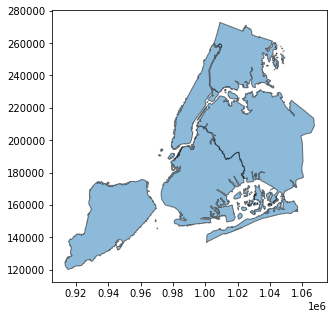

In [14]:
ax = df.plot(figsize=(5,5), alpha=0.5, edgecolor='k')

In [16]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

In [19]:
gdf_councils

OBJECTID_1 District                  Council_me   ShapeSTArea  \
0         811        5             Vanna Pianfetti  1.827758e+08   
1         812        3                  Angie Brix  2.007085e+08   
2         813        1  Clarissa Nickerson Fourman  1.078965e+08   
3         814        4                  Greg Stock  1.049800e+08   
4         815        2                 Alicia Beck  5.164512e+07   

   ShapeSTLength                                           geometry  
0  209845.933925  POLYGON ((-88.31441 40.11699, -88.31454 40.116...  
1  145404.494177  POLYGON ((-88.27716 40.16364, -88.27732 40.163...  
2   83420.727939  POLYGON ((-88.22283 40.16000, -88.22283 40.160...  
3   77363.320814  POLYGON ((-88.26890 40.12733, -88.27076 40.127...  
4   62243.277115  POLYGON ((-88.23537 40.10798, -88.23537 40.107...

In [20]:
gdf_councils.describe()

OBJECTID_1   ShapeSTArea  ShapeSTLength
count    5.000000  5.000000e+00       5.000000
mean   813.000000  1.296012e+08  115655.550794
std      1.581139  6.131525e+07   61471.695860
min    811.000000  5.164512e+07   62243.277115
25%    812.000000  1.049800e+08   77363.320814
50%    813.000000  1.078965e+08   83420.727939
75%    814.000000  1.827758e+08  145404.494177
max    815.000000  2.007085e+08  209845.933925

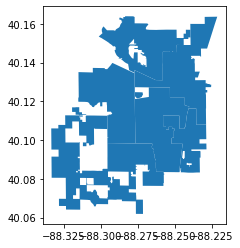

In [21]:
gdf_councils.plot()

In [24]:
import matplotlib.pyplot as plt

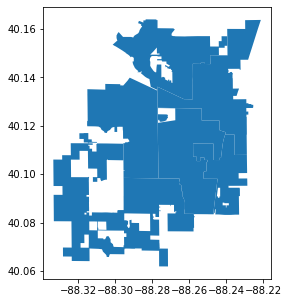

In [25]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)

plt.show()

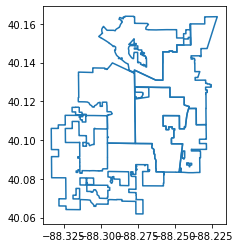

In [26]:
# example of shape-data specific plotting routine:
gdf_councils.boundary.plot()

In [27]:
# another shape-data specific function is to get bounding boxes:
gdf_councils.bounds

minx       miny       maxx       maxy
0 -88.333303  40.061894 -88.257012  40.116995
1 -88.315071  40.098268 -88.239120  40.163956
2 -88.277158  40.107938 -88.221225  40.163721
3 -88.276971  40.083257 -88.240119  40.127432
4 -88.257818  40.083182 -88.228505  40.116346

In [28]:
# specific to shape data: centers of our invidiual objects
gdf_councils.centroid

/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


0    POINT (-88.29998 40.08731)
1    POINT (-88.28231 40.13389)
2    POINT (-88.24309 40.13570)
3    POINT (-88.25983 40.10719)
4    POINT (-88.24095 40.10021)
dtype: geometry

In [29]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
# grab more Champaign city GIS data -- properties that the city owns
gdf_props = geopandas.read_file('https://opendata.arcgis.com/datasets/3ecbc7baf1a44110a98f6d4420432000_2.geojson')

In [32]:
gdf_props.head()

OBJECTID COMMENTS    CB DEPT           PIN ACREAGE CODE_TYPE  \
0         1                 PWD  412001326010  0.755*         A   
1         2           None  NSD  422012226003  4.432*         D   
2         3           None  NSD  422012226004  0.181*         D   
3         4           None  NSD  422012226005  0.186*         D   
4         5           None  NSD  422012226006  0.185*         D   

          DESCRIPTION                 TYPE DEPT_ABBR      DESCRIP_ADDR  \
0   Drainage/Boneyard     Boneyard Channel       PWD  Boneyard Channel   
1  City Redevelopment  Beardsley Park Plan       NSD       1110 N Neil   
2  City Redevelopment  Beardsley Park Plan       NSD       1110 N Neil   
3  City Redevelopment  Beardsley Park Plan       NSD       1108 N Neil   
4  City Redevelopment  Beardsley Park Plan       NSD       1106 N Neil   

              FUTURE     PA ZONING   ShapeSTArea  ShapeSTLength  \
0  Flood Hazard Area  101.0    MHP  32930.497803     897.925620   
1  Neighborhood Plan    1.0   SF 1   1930.800537     272.145439   
2  Neighborhood Plan    1.0   SF 1   7915.196533     372.150616   
3  Neighborhood Plan    1.0   SF 1   8104.292847     377.890980   
4  Neighborhood Plan    1.0   SF 1   8088.671143     377.710096   

                                            geometry  
0  POLYGON ((-88.25043 40.13085, -88.25044 40.130...  
1  POLYGON ((-88.24300 40.12699, -88.24300 40.127...  
2  POLYGON ((-88.24300 40.12681, -88.24300 40.126...  
3  POLYGON ((-88.24344 40.12663, -88.24300 40.126...  
4  POLYGON ((-88.24344 40.12645, -88.24299 40.126...

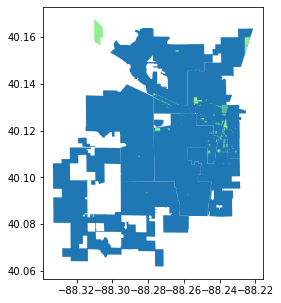

In [37]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=1.0)

gdf_props.plot(ax=ax, color='lightgreen', alpha=1.0)

plt.show()

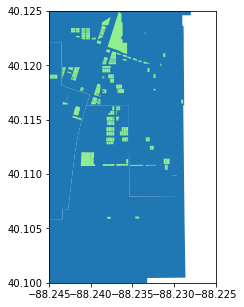

In [38]:
# let's zoom in to where we would be if we were in person right now!
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=1.0)

gdf_props.plot(ax=ax, color='lightgreen', alpha=1.0)

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

plt.show()

In [39]:
gdf_apt = geopandas.read_file('https://opendata.arcgis.com/datasets/64154052c5a040e287bae1583d727825_8.geojson')

In [41]:
gdf_apt.head()

OBJECTID             Address        Parcel Units Stories  UniqueID  \
0         1  2009 Moreland Blvd  412001126038    36       3       0.0   
1         2  2011 Moreland Blvd  412001126038    36      3        1.0   
2         3  2007 Moreland Blvd  412001126038    24       3       2.0   
3         4  2003 Moreland Blvd  412001126038    36       3       3.0   
4         5  2005 Moreland Blvd  412001126038    24       3       4.0   

        Building_Name                     Complex_Name Case_Number  \
0  2009 Moreland Blvd  University Village at Champaign   AI07-0147   
1  2011 Moreland Blvd  University Village at Champaign   AI07-0147   
2  2007 Moreland Blvd  University Village at Champaign   AI07-0147   
3  2003 Moreland Blvd  University Village at Champaign   AI07-0147   
4  2005 Moreland Blvd  University Village at Champaign   AI07-0147   

  Building_Type  ... Comments Safety_Comments Fire_Alarms Sprinkler  \
0       Complex  ...                                  Yes       Yes   
1       Complex  ...                                  Yes       Yes   
2       Complex  ...                                  Yes       Yes   
3       Complex  ...                                  Yes       Yes   
4       Complex  ...                                  Yes       Yes   

  Managing_Company MFRecyclingStatus   ShapeSTArea ShapeSTLength  Shape  \
0             None               Yes  19657.997437    929.167804   None   
1             None               Yes  19735.512329    950.194217   None   
2             None               Yes  13970.178833    678.398035   None   
3             None               Yes  19739.423340    941.358477   None   
4             None               Yes  13065.121582    636.744457   None   

                                            geometry  
0  POLYGON ((-88.25315 40.14017, -88.25315 40.140...  
1  POLYGON ((-88.25260 40.14057, -88.25256 40.140...  
2  POLYGON ((-88.25274 40.14045, -88.25274 40.140...  
3  POLYGON ((-88.25154 40.13978, -88.25156 40.139...  
4  POLYGON ((-88.25351 40.13934, -88.25348 40.139...  

[5 rows x 22 columns]

In [44]:
# we can add another layer, but color by a specific data attribute, in this case, 
# let's choose the number of stories in the building
gdf_apt['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', ' ', '8', None, '16', '13'], dtype=object)

In [46]:
# If we have a None -- we'll turn that into a zero (recall in Python None is a Null value)
gdf_apt.loc[gdf_apt['Stories'].isnull()]

OBJECTID                Address        Parcel Units Stories  UniqueID  \
2023      2065  3702-3716 Balcary Bay  412004374045     8    None       NaN   
2024      2066  3718-3732 Balcary Bay  412004374045     8    None       NaN   
2025      2067     1901 Blackthorn Dr  452022433901  None    None       NaN   
2026      2068     1911 Blackthorn Dr  452022433901  None    None       NaN   
2027      2069     1909 Blackthorn Dr  452022433901  None    None       NaN   
...        ...                    ...           ...   ...     ...       ...   
2310      3677       4520 Nicklaus Dr  462029402001  None    None       NaN   
2311      3678       4530 Nicklaus Dr  462029402001  None    None       NaN   
2312      3679       4550 Nicklaus Dr  462029402001  None    None       NaN   
2313      3680       4510 Nicklaus Dr  462029402001  None    None       NaN   
2314      3681       4502 Nicklaus Dr  462029402001  None    None       NaN   

              Building_Name Complex_Name Case_Number Building_Type  ...  \
2023  3702-3716 Balcary Bay         None        None      Building  ...   
2024  3718-3732 Balcary Bay         None        None          None  ...   
2025     1901 Blackthorn Dr         None        None          None  ...   
2026     1911 Blackthorn Dr         None        None          None  ...   
2027     1909 Blackthorn Dr         None        None          None  ...   
...                     ...          ...         ...           ...  ...   
2310                   None         None        None          None  ...   
2311                   None         None        None          None  ...   
2312                   None         None        None          None  ...   
2313                   None         None        None          None  ...   
2314                   None         None        None          None  ...   

                                           Comments Safety_Comments  \
2023                                           None            None   
2024                                           None            None   
2025  All Recycling bill sent to 1901 Blackthorn Dr            None   
2026  All Recycling bill sent to 1901 Blackthorn Dr            None   
2027  All Recycling bill sent to 1901 Blackthorn Dr            None   
...                                             ...             ...   
2310                                           None            None   
2311                                           None            None   
2312                                           None            None   
2313                                           None            None   
2314                                           None            None   

     Fire_Alarms Sprinkler Managing_Company MFRecyclingStatus   ShapeSTArea  \
2023        None      None             None               Yes   5614.825806   
2024        None      None             None               Yes   5523.739746   
2025        None      None             None               Yes    863.590454   
2026        None      None             None               Yes    889.740112   
2027        None      None             None               Yes    856.504395   
...          ...       ...              ...               ...           ...   
2310        None      None             None              None  10704.797974   
2311        None      None             None              None  13027.200562   
2312        None      None             None              None  11853.411499   
2313        None      None             None              None  11073.249023   
2314        None      None             None              None  15584.976929   

     ShapeSTLength  Shape                                           geometry  
2023    337.484567   None  POLYGON ((-88.30721 40.12940, -88.30721 40.129...  
2024    327.770243   None  POLYGON ((-88.30776 40.12940, -88.30776 40.129...  
2025    141.279106   None  POLYGON ((-88.27878 40.08716, -88.27878 40.087...  
2026    144.884547   None  POLYGON ((-

In [48]:
gdf_apt.loc[gdf_apt['Stories'].isnull(), 'Stories'] = '0' # set Null stories to the string '0'

Note: this is one choice we are making to change nulls into zeros -- we could have left of this data completely!  Or tagged as -1.

In [50]:
gdf_apt['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', ' ', '8', '0', '16', '13'], dtype=object)

We note there are some empty entries -- set these to zeros as well:

In [52]:
gdf_apt.loc[gdf_apt['Stories']==' ']

OBJECTID                Address        Parcel Units Stories  UniqueID  \
597        598        209 E Healey St  462118105015     6             657.0   
598        599        307 E Healey St  462118106006    16             658.0   
599        600        309 E Healey St  462118106007    16             659.0   
606        607  111 E Springfield Ave  462118101014     4             666.0   
607        608  107 E Springfield Ave  462118101014    60             667.0   
...        ...                    ...           ...   ...     ...       ...   
1609      1649        116 N Walnut St  422012435018     3            1217.0   
1612      1654          402 S Lynn St  432013127001     3            1173.0   
2124      2168          56 E Green St  432013232013     6            1022.0   
2125      2169          56 E Green St  432013232013    12            1025.0   
2304      3666         806 S First St  462118151009     6             986.0   

                Building_Name Complex_Name Case_Number Building_Type  ...  \
597           209 E Healey St                AI06-0115      Building  ...   
598           307 E Healey St                AI09-0043      Building  ...   
599   Healey Court Apartments                AI09-0044      Building  ...   
606     111 E Springfield Ave                AI08-0084      Building  ...   
607     107 E Springfield Ave                AI08-0084      Building  ...   
...                       ...          ...         ...           ...  ...   
1609          116 N Walnut St                AI09-0162      Building  ...   
1612            402 S Lynn St                AI10-0093      Building  ...   
2124            56 E Green St                AI11-0014      Building  ...   
2125            56 E Green St                AI11-0014      Building  ...   
2304           806 S First St                AI10-0080      Building  ...   

     Comments Safety_Comments Fire_Alarms Sprinkler Managing_Company  \
597                                  None      None             None   
598                                  None      None             None   
599                                  None      None             None   
606                                  None      None             None   
607                                  None      None             None   
...       ...             ...         ...       ...              ...   
1609                                 None      None             None   
1612                                 None      None             None   
2124                                 None      None             None   
2125                                 None      None             None   
2304                                 None      None             None   

     MFRecyclingStatus   ShapeSTArea ShapeSTLength  Shape  \
597               None   1002.769653    126.668062   None   
598                Yes   6534.171021    434.053389   None   
599                Yes   6636.536865    438.905404   None   
606               None   2892.494385    218.629349   None   
607                Yes  23890.443848   1694.540817   None   
...                ...           ...           ...    ...   
1609              None   1270.198486    170.127603   None   
1612              None    771.259155    128.058002   None   
2124               Yes   1543.858398    159.200027   None   
2125               Yes   3540.819702    251.232985   None   
2304               Yes   2458.709961    212.461571   None   

                                               geometry  
597   POLYGON ((-88.23587 40.11130, -88.23598 40.111...  
598   POLYGON ((-88.23445 40.11095, -88.23445 40.111...  
599   POLYGON ((-88.23433 40.11105, -88.23440 40.111...  
606   POLYGON ((-88.23722 40.11232, -88.23722 40.112...  
607   POLYGON ((-88.23759 40.11241, -88.23759 40.112...  
...                                                 ...  
1609  POLYGON ((-88.24208 40.11682, -88.24206 40.116...  
1612  POLYGON ((-88.25154 40.11238, -88.25155 40.112...  
2124  POLYGO

In [54]:
gdf_apt.loc[gdf_apt['Stories']==' ', 'Stories'] = '0'

In [55]:
gdf_apt['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', '0', '8', '16', '13'], dtype=object)

In [57]:
gdf_apt['Stories'] = pd.to_numeric(gdf_apt['Stories'],errors='coerce')
# changing our data to numeric and telling pandas to "figure out" any errors on its own

In [58]:
gdf_apt['Stories'].unique()

array([ 3,  2,  1,  5,  6,  4, 20, 24,  7,  0,  8, 16, 13])

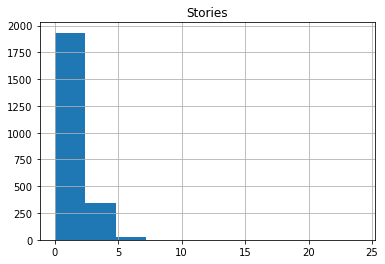

In [59]:
gdf_apt.hist(column='Stories')
plt.show()

Plot our cleaned apartment data over the city council map:

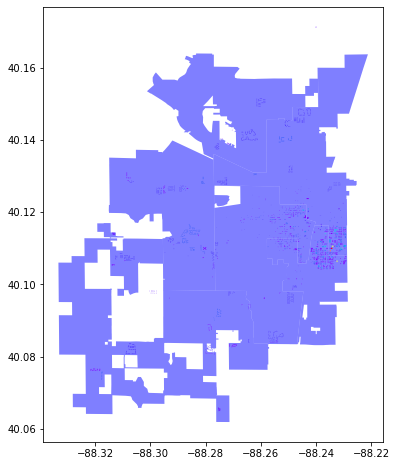

In [62]:
fig, ax = plt.subplots(figsize=(8,8))
gdf_councils.plot(ax=ax, color='blue', alpha=0.5)

gdf_apt.plot(column='Stories', ax=ax, cmap='rainbow')

plt.show()

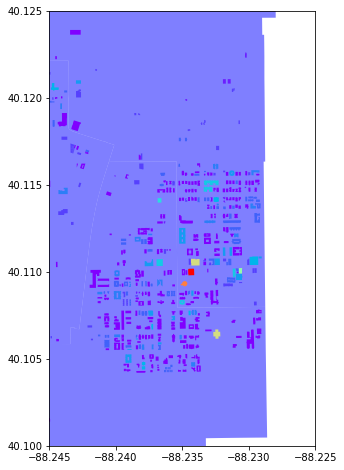

In [63]:
fig, ax = plt.subplots(figsize=(8,8))
gdf_councils.plot(ax=ax, color='blue', alpha=0.5)

gdf_apt.plot(column='Stories', ax=ax, cmap='rainbow')

# zooming in to where we would be if in person
ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

plt.show()

Coloring by other things:

In [65]:
gdf_apt = geopandas.read_file('https://opendata.arcgis.com/datasets/64154052c5a040e287bae1583d727825_8.geojson')
gdf_apt['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', None, 'Other'],
      dtype=object)

In [66]:
gdf_apt.loc[gdf_apt['Building_Type'].isnull()]

OBJECTID                Address        Parcel Units Stories  UniqueID  \
2024      2066  3718-3732 Balcary Bay  412004374045     8    None       NaN   
2025      2067     1901 Blackthorn Dr  452022433901  None    None       NaN   
2026      2068     1911 Blackthorn Dr  452022433901  None    None       NaN   
2027      2069     1909 Blackthorn Dr  452022433901  None    None       NaN   
2028      2070     1907 Blackthorn Dr  452022433901  None    None       NaN   
...        ...                    ...           ...   ...     ...       ...   
2310      3677       4520 Nicklaus Dr  462029402001  None    None       NaN   
2311      3678       4530 Nicklaus Dr  462029402001  None    None       NaN   
2312      3679       4550 Nicklaus Dr  462029402001  None    None       NaN   
2313      3680       4510 Nicklaus Dr  462029402001  None    None       NaN   
2314      3681       4502 Nicklaus Dr  462029402001  None    None       NaN   

              Building_Name Complex_Name Case_Number Building_Type  ...  \
2024  3718-3732 Balcary Bay         None        None          None  ...   
2025     1901 Blackthorn Dr         None        None          None  ...   
2026     1911 Blackthorn Dr         None        None          None  ...   
2027     1909 Blackthorn Dr         None        None          None  ...   
2028     1907 Blackthorn Dr         None        None          None  ...   
...                     ...          ...         ...           ...  ...   
2310                   None         None        None          None  ...   
2311                   None         None        None          None  ...   
2312                   None         None        None          None  ...   
2313                   None         None        None          None  ...   
2314                   None         None        None          None  ...   

                                           Comments Safety_Comments  \
2024                                           None            None   
2025  All Recycling bill sent to 1901 Blackthorn Dr            None   
2026  All Recycling bill sent to 1901 Blackthorn Dr            None   
2027  All Recycling bill sent to 1901 Blackthorn Dr            None   
2028  All Recycling bill sent to 1901 Blackthorn Dr            None   
...                                             ...             ...   
2310                                           None            None   
2311                                           None            None   
2312                                           None            None   
2313                                           None            None   
2314                                           None            None   

     Fire_Alarms Sprinkler Managing_Company MFRecyclingStatus   ShapeSTArea  \
2024        None      None             None               Yes   5523.739746   
2025        None      None             None               Yes    863.590454   
2026        None      None             None               Yes    889.740112   
2027        None      None             None               Yes    856.504395   
2028        None      None             None               Yes    806.172607   
...          ...       ...              ...               ...           ...   
2310        None      None             None              None  10704.797974   
2311        None      None             None              None  13027.200562   
2312        None      None             None              None  11853.411499   
2313        None      None             None              None  11073.249023   
2314        None      None             None              None  15584.976929   

     ShapeSTLength  Shape                                           geometry  
2024    327.770243   None  POLYGON ((-88.30776 40.12940, -88.30776 40.129...  
2025    141.279106   None  POLYGON ((-88.27878 40.08716, -88.27878 40.087...  
2026    144.884547   None  POLYGON ((-88.27865 40.08742, -88.27865 40.087...  
2027    149.155272   None  POLYGON ((-

In [68]:
gdf_apt.loc[gdf_apt['Building_Type'].isnull(),'Building_Type'] = 'Not Specified'

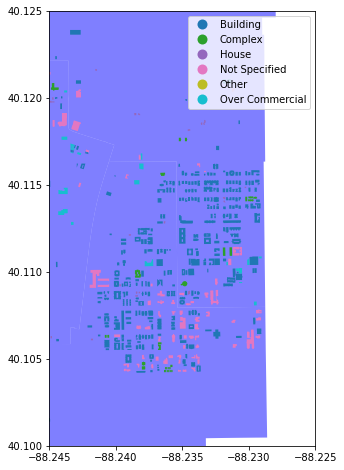

In [73]:
fig, ax = plt.subplots(figsize=(8,8))

gdf_councils.plot(ax=ax, color='blue', alpha=0.5)
gdf_apt.plot(column='Building_Type',ax=ax, cmap='tab10', categorical=True, legend=True)

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

plt.show()

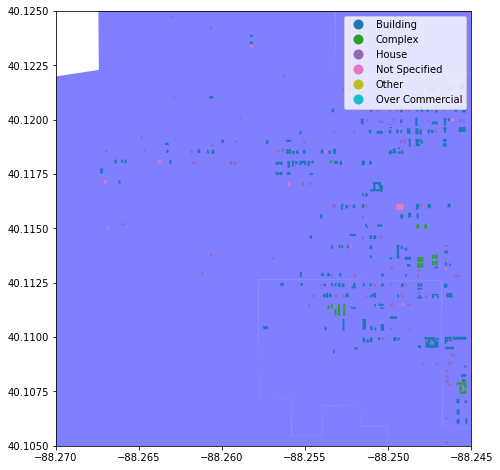

In [76]:
fig, ax = plt.subplots(figsize=(8,8))

gdf_councils.plot(ax=ax, color='blue', alpha=0.5)
gdf_apt.plot(column='Building_Type',ax=ax, cmap='tab10', categorical=True, legend=True)

ax.set_xlim(-88.27, -88.245)
ax.set_ylim(40.105, 40.125)

plt.show()

## US Census data shape files

In [77]:
gdf_states = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2020/STATE/tl_2020_us_state.zip')

In [78]:
gdf_states

REGION DIVISION STATEFP   STATENS GEOID STUSPS  \
0       3        5      54  01779805    54     WV   
1       3        5      12  00294478    12     FL   
2       2        3      17  01779784    17     IL   
3       2        4      27  00662849    27     MN   
4       3        5      24  01714934    24     MD   
5       1        1      44  01219835    44     RI   
6       4        8      16  01779783    16     ID   
7       1        1      33  01779794    33     NH   
8       3        5      37  01027616    37     NC   
9       1        1      50  01779802    50     VT   
10      1        1      09  01779780    09     CT   
11      3        5      10  01779781    10     DE   
12      4        8      35  00897535    35     NM   
13      4        9      06  01779778    06     CA   
14      1        2      34  01779795    34     NJ   
15      2        3      55  01779806    55     WI   
16      4        9      41  01155107    41     OR   
17      2        4      31  01779792    31     NE   
18      1        2      42  01779798    42     PA   
19      4        9      53  01779804    53     WA   
20      3        7      22  01629543    22     LA   
21      3        5      13  01705317    13     GA   
22      3        6      01  01779775    01     AL   
23      4        8      49  01455989    49     UT   
24      2        3      39  01085497    39     OH   
25      3        7      48  01779801    48     TX   
26      4        8      08  01779779    08     CO   
27      3        5      45  01779799    45     SC   
28      3        7      40  01102857    40     OK   
29      3        6      47  01325873    47     TN   
30      4        8      56  01779807    56     WY   
31      4        9      15  01779782    15     HI   
32      2        4      38  01779797    38     ND   
33      3        6      21  01779786    21     KY   
34      9        0      78  01802710    78     VI   
35      9        0      69  01779809    69     MP   
36      9        0      66  01802705    66     GU   
37      1        1      23  01779787    23     ME   
38      1        2      36  01779796    36     NY   
39      4        8      32  01779793    32     NV   
40      4        9      02  01785533    02     AK   
41      9        0      60  01802701    60     AS   
42      2        3      26  01779789    26     MI   
43      3        7      05  00068085    05     AR   
44      3        6      28  01779790    28     MS   
45      2        4      29  01779791    29     MO   
46      4        8      30  00767982    30     MT   
47      2        4      20  00481813    20     KS   
48      2        3      18  00448508    18     IN   
49      9        0      72  01779808    72     PR   
50      2        4      46  01785534    46     SD   
51      1        1      25  00606926    25     MA   
52      3        5      51  01779803    51     VA   
53      3        5      11  01702382    11     DC   
54      2        4      19  01779785    19     IA   
55      4        8      04  01779777    04     AZ   

                                            NAME LSAD  MTFCC FUNCSTAT  \
0                                  West Virginia   00  G4000        A   
1                                        Florida   00  G4000        A   
2                                       Illinois   00  G4000        A   
3                                      Minnesota   00  G4000        A   
4                                       Maryland   00  G4000        A   
5                                   Rhode Island   00  G4000        A   
6                                          Idaho   00  G4000        A   
7                                  New Hampshire   00  G4000        A   
8                                 North Carolina   00  G4000        A   
9                                        Vermont   00  G4000        A   
10                                   Connecticut   00  G4000        A   
11                                      Delaware   00  G4000        A   
12                              

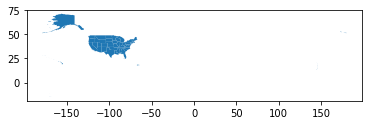

In [79]:
gdf_states.plot()

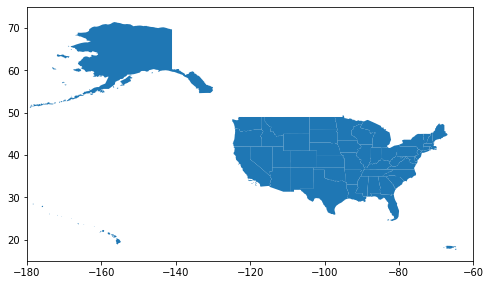

In [80]:
fig, ax = plt.subplots(figsize=(8,5))

gdf_states.plot(ax=ax)

# zoom into USA
ax.set_xlim(-180,-60)
ax.set_ylim(15,75)
plt.show()

We can download and access the data locally:

In [86]:
gdf_na = geopandas.read_file('/Users/jillnaiman/Downloads/tl_2020_us_aiannh/tl_2020_us_aiannh.shp')
# needed full path name

In [83]:
!ls ~/Downloads/tl_2020_us_aiannh/

tl_2020_us_aiannh.cpg            tl_2020_us_aiannh.shp.ea.iso.xml
tl_2020_us_aiannh.dbf            tl_2020_us_aiannh.shp.iso.xml
tl_2020_us_aiannh.prj            tl_2020_us_aiannh.shx
tl_2020_us_aiannh.shp


In [88]:
# or read in from the US Census database:
gdf_na = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2020/AIANNH/tl_2020_us_aiannh.zip')

In [89]:
gdf_na.head()

AIANNHCE  AIANNHNS  GEOID                    NAME  \
0     2320  02419022  2320R                 Mohegan   
1     9100  01930930  9100R  Golden Hill Paugussett   
2     4110  02419484  4110R          Table Mountain   
3     1380  01666180  1380R              Greenville   
4     1110  00806894  1110R                Flathead   

                                     NAMELSAD LSAD CLASSFP COMPTYP AIANNHR  \
0                         Mohegan Reservation   86      D2       R       F   
1  Golden Hill Paugussett (state) Reservation   86      D4       R       S   
2                    Table Mountain Rancheria   85      D8       R       F   
3                        Greenville Rancheria   85      D2       R       F   
4                        Flathead Reservation   86      D2       R       F   

   MTFCC FUNCSTAT       ALAND     AWATER     INTPTLAT      INTPTLON  \
0  G2101        A     2457042        123  +41.4858024  -072.0902766   
1  G2101        A      399343          0  +41.5521875  -072.2680204   
2  G2101        A      371387          0  +36.9850490  -119.6396814   
3  G2101        A      284692          0  +40.1487839  -120.8933989   
4  G2101        A  5013467058  316267874  +47.4967703  -114.2842791   

                                            geometry  
0  MULTIPOLYGON (((-72.08306 41.49763, -72.08284 ...  
1  MULTIPOLYGON (((-72.26917 41.55472, -72.26774 ...  
2  POLYGON ((-119.64082 36.98500, -119.64058 36.9...  
3  POLYGON ((-120.89737 40.15100, -120.89733 40.1...  
4  POLYGON ((-114.85121 47.88721, -114.81989 47.8...

Adding the Native American land masses to our USA land masses map:

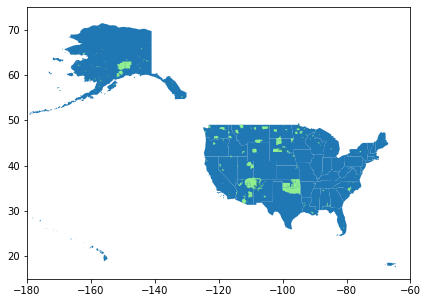

In [90]:
fig, ax = plt.subplots(figsize=(8,5))

gdf_states.plot(ax=ax)

gdf_na.plot(ax=ax, color='lightgreen')

ax.set_xlim(-180,-60)
ax.set_ylim(15,75)

plt.show()

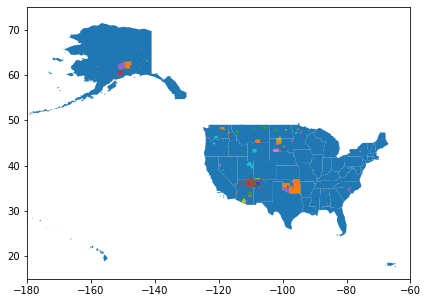

In [91]:
fig, ax = plt.subplots(figsize=(8,5))

gdf_states.plot(ax=ax)

#gdf_na.plot(ax=ax, color='lightgreen')
gdf_na.plot(ax=ax, column='NAMELSAD')

ax.set_xlim(-180,-60)
ax.set_ylim(15,75)

plt.show()

## Geopandas + contextily

In [93]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))
gdf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

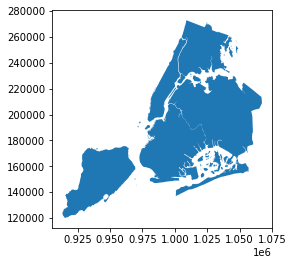

In [94]:
gdf.plot()

In [95]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [96]:
gdf = gdf.to_crs(epsg=4326)

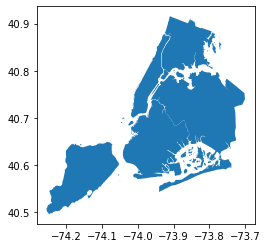

In [97]:
gdf.plot()

Use contextily to plot a "context map" underneath:

In [98]:
import contextily as ctx

In [99]:
# translate the NYBB dataset into the defaults for contextily
gdf = gdf.to_crs(epsg=3857)

In [101]:
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

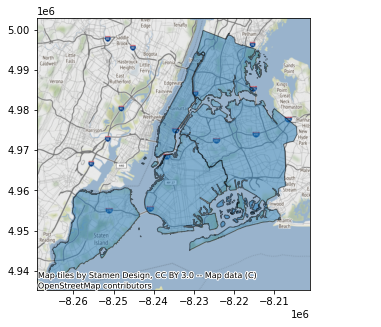

In [105]:
fig, ax = plt.subplots(figsize=(8,5))

gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)

plt.show()

In [106]:
# back to lat/long:
gdf = gdf.to_crs(epsg=4326)

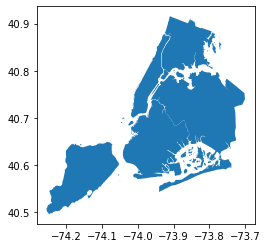

In [107]:
gdf.plot()

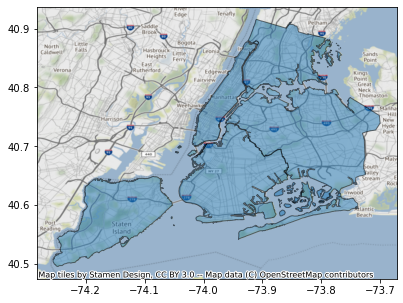

In [111]:
fig, ax = plt.subplots(figsize=(8,5))

gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
#ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)

plt.show()

In [112]:
gdf_councils

OBJECTID_1 District                  Council_me   ShapeSTArea  \
0         811        5             Vanna Pianfetti  1.827758e+08   
1         812        3                  Angie Brix  2.007085e+08   
2         813        1  Clarissa Nickerson Fourman  1.078965e+08   
3         814        4                  Greg Stock  1.049800e+08   
4         815        2                 Alicia Beck  5.164512e+07   

   ShapeSTLength                                           geometry  
0  209845.933925  POLYGON ((-88.31441 40.11699, -88.31454 40.116...  
1  145404.494177  POLYGON ((-88.27716 40.16364, -88.27732 40.163...  
2   83420.727939  POLYGON ((-88.22283 40.16000, -88.22283 40.160...  
3   77363.320814  POLYGON ((-88.26890 40.12733, -88.27076 40.127...  
4   62243.277115  POLYGON ((-88.23537 40.10798, -88.23537 40.107...

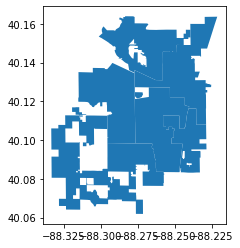

In [113]:
gdf_councils.plot()

In [114]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

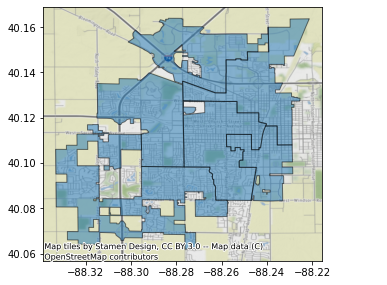

In [119]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
#ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)

plt.show()

In [120]:
# to clean the data:
gdf_apt.loc[gdf_apt['Building_Type'].isnull(),'Building_Type'] = 'Not Specified'

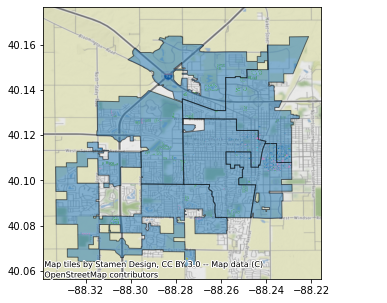

In [121]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_apt.plot(column='Building_Type',ax=ax, cmap='tab10')
#ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)

plt.show()

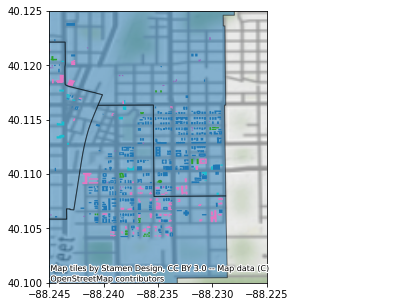

In [122]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_apt.plot(column='Building_Type',ax=ax, cmap='tab10')
#ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

plt.show()

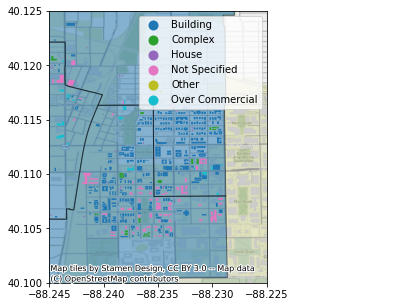

In [124]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_apt.plot(column='Building_Type',ax=ax, cmap='tab10', legend=True)
#ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)

plt.show()

## Geopandas + contextily + ipywidgets

In [125]:
import ipywidgets

In [126]:
gdf_apt['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', 'Not Specified',
       'Other'], dtype=object)

Start by "hard coding" one of these options and then build interactivity from there.

In [128]:
btype = 'Building'

gdf_apt.loc[gdf_apt['Building_Type']==btype].head()

OBJECTID            Address                       Parcel Units Stories  \
20        21     410 E Green St  462118129026 & 462118129027    64       5   
21        22     408 E Green St                 462118129017    28       3   
22        23     406 E Green St                 462118129017     9       2   
96        97  1114 Broadmoor Dr                 452023257004     4       1   
97        98  1201 Broadmoor Dr                 452023256021     2       1   

    UniqueID      Building_Name                Complex_Name Case_Number  \
20      20.0     410 E Green St                                    None   
21      21.0     408 E Green St                               AI08-0013   
22      22.0     406 E Green St                               AI08-0013   
96     112.0  1114 Broadmoor Dr                               AI09-0018   
97     113.0  1201 Broadmoor Dr  Broadmoor Drive Apartments        None   

   Building_Type  ... Comments Safety_Comments Fire_Alarms Sprinkler  \
20      Building  ...     None            None        None      None   
21      Building  ...                                 None      None   
22      Building  ...                                 None      None   
96      Building  ...                                 None      None   
97      Building  ...     None            None        None      None   

   Managing_Company MFRecyclingStatus   ShapeSTArea ShapeSTLength  Shape  \
20             None               Yes  15958.883057    507.147218   None   
21             None               Yes   8914.532959    539.800411   None   
22             None               Yes   2434.252197    215.323497   None   
96             None              None   2008.372314    187.683177   None   
97             None              None   3677.721069    413.708046   None   

                                             geometry  
20  POLYGON ((-88.23259 40.11039, -88.23218 40.110...  
21  POLYGON ((-88.23259 40.11039, -88.23260 40.110...  
22  POLYGON ((-88.23284 40.11054, -88.23297 40.110...  
96  POLYGON ((-88.26361 40.09367, -88.26373 40.093...  
97  POLYGON ((-88.26447 40.09370, -88.26447 40.093...  

[5 rows x 22 columns]

Use this subset to re-make our plot:

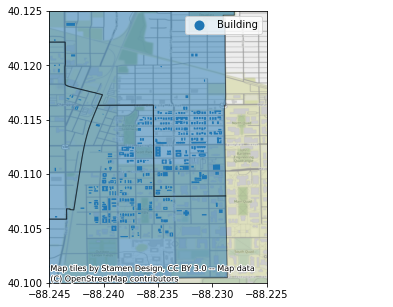

In [130]:
btype = 'Building'

gdf_apt_subset = gdf_apt.loc[gdf_apt['Building_Type']==btype]

fig, ax = plt.subplots(figsize=(5,5))

ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_apt_subset.plot(column='Building_Type', ax=ax, cmap='tab10', categorical=True, legend=True)
ctx.add_basemap(ax=ax, crs=gdf_councils.crs)

plt.show()

Next step in "widgetizing" this is to make a function with our "hard coded" option as an input to the function:

In [134]:
def my_geo_plot(btype):
    gdf_apt_subset = gdf_apt.loc[gdf_apt['Building_Type']==btype]

    fig, ax = plt.subplots(figsize=(5,5))

    ax.set_xlim(-88.245, -88.225)
    ax.set_ylim(40.10, 40.125)

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_apt_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True)
    ctx.add_basemap(ax=ax, crs=gdf_councils.crs)

    plt.show()    

Important part of the process is testing out the function!

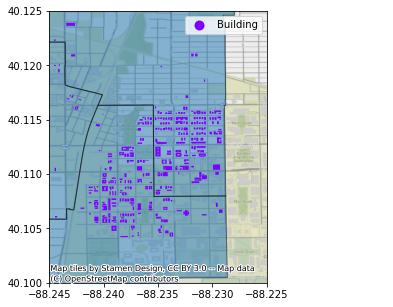

In [135]:
my_geo_plot('Building')

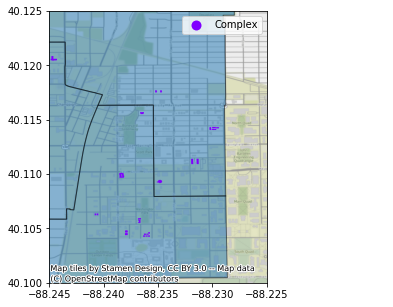

In [136]:
my_geo_plot('Complex')

Use `ipywidgets.interact` to make the function interactive.

In [137]:
@ipywidgets.interact(btype=gdf_apt['Building_Type'].unique())
def my_geo_plot(btype):
    gdf_apt_subset = gdf_apt.loc[gdf_apt['Building_Type']==btype]

    fig, ax = plt.subplots(figsize=(5,5))

    ax.set_xlim(-88.245, -88.225)
    ax.set_ylim(40.10, 40.125)

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_apt_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True)
    ctx.add_basemap(ax=ax, crs=gdf_councils.crs)

    plt.show() 

interactive(children=(Dropdown(description='btype', options=('Complex', 'Building', 'House', 'Over Commercial'…

Extra: adding more options -- looking over specified areas!

In [148]:
xrange = ipywidgets.FloatRangeSlider(min=-88.32*100, max=-88.23*100)

In [149]:
xrange

FloatRangeSlider(value=(-8829.75, -8825.25), max=-8823.0, min=-8832.0)

In [150]:
xrange.keys

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [151]:
xrange.value

(-8829.5, -8824.6)

In [153]:
xrange.value[0]/100

-88.295

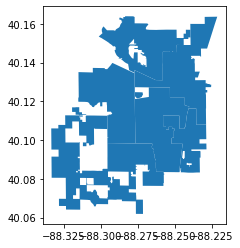

In [143]:
gdf_councils.plot()

interactive(children=(Dropdown(description='btype', options=('Complex', 'Building', 'House', 'Over Commercial'…

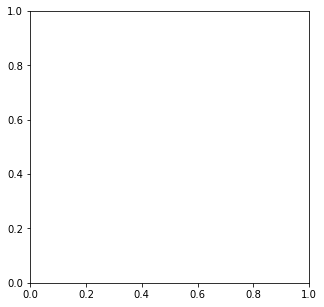

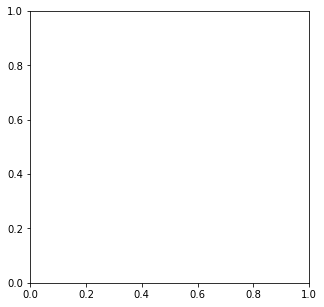

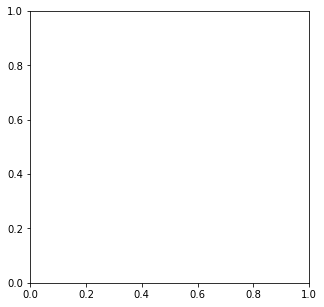

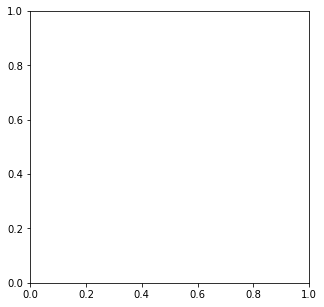

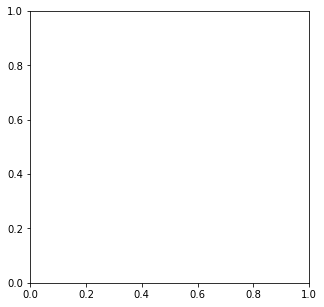

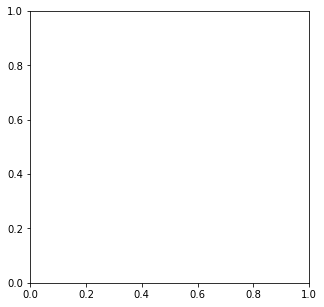

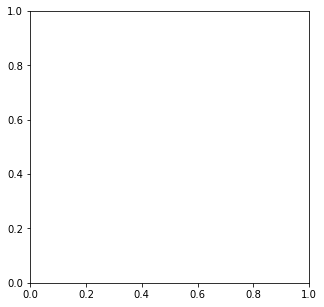

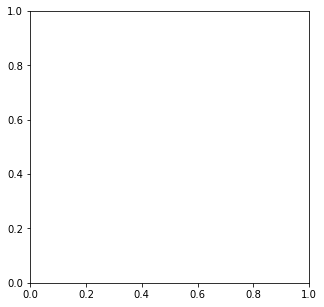

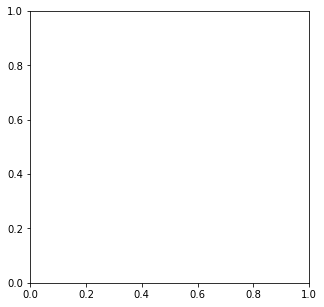

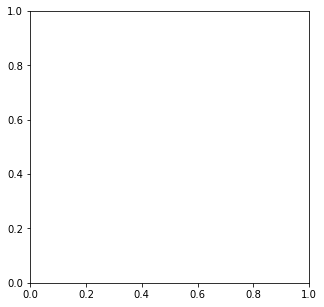

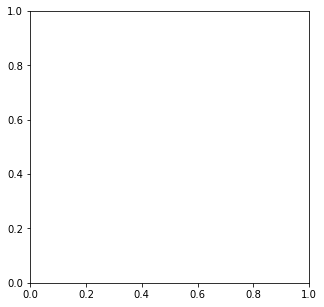

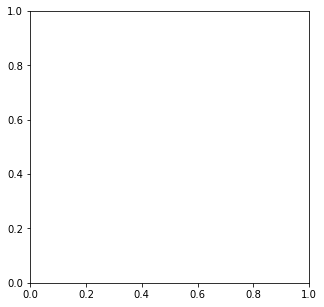

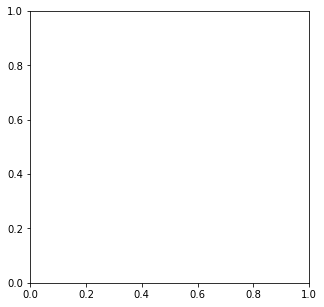

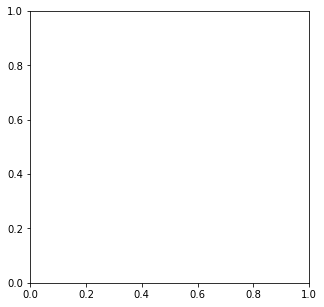

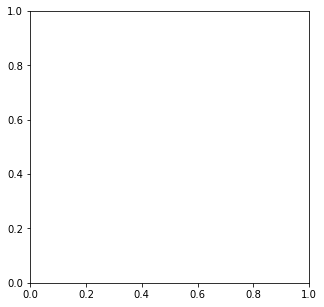

In [156]:
@ipywidgets.interact(btype=gdf_apt['Building_Type'].unique(), xlim=xrange) # can change x/ylim but its a bit slow!
def my_geo_plot(btype, xlim):
    gdf_apt_subset = gdf_apt.loc[gdf_apt['Building_Type']==btype]

    fig, ax = plt.subplots(figsize=(5,5))

    #ax.set_xlim(-88.245, -88.225)
    #print(xlim)
    ax.set_xlim(xlim[0]/100, xlim[1]/100)
    ax.set_ylim(40.10, 40.125)

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='k')
    gdf_apt_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', categorical=True, legend=True)
    ctx.add_basemap(ax=ax, crs=gdf_councils.crs)

    plt.show()

## Looping back to bqplot and maps

In [159]:
# 1. Data (Axis)
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. Scales
sc_geo = bqplot.AlbersUSA()

# 3. Marks & interactivity
tt = bqplot.Tooltip(fields=['id', 'name'])
states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo}, tooltip=tt)

fig = bqplot.Figure(marks=[states_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [161]:
# 1. Data (Axis)
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. Scales
sc_geo = bqplot.AlbersUSA()

# 3. Marks & interactivity
tt = bqplot.Tooltip(fields=['id', 'name'])
states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo}, tooltip=tt)

# 4. Add in interactions
states_map.interactions = {'click':'select', 'hover':'tooltip'}

fig = bqplot.Figure(marks=[states_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [162]:
# 1. Data (Axis)
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. Scales
sc_geo = bqplot.AlbersUSA()

# 3. Marks & interactivity
tt = bqplot.Tooltip(fields=['id', 'name'])
states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo}, tooltip=tt)

# 4. Add in interactions
states_map.interactions = {'click':'select', 'hover':'tooltip'}

def on_selected(change):
    print(change)
    
states_map.observe(on_selected, 'selected')

fig = bqplot.Figure(marks=[states_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

{'name': 'selected', 'old': None, 'new': array([32]), 'owner': Map(hovered_styles={'hovered_fill': 'Orange', 'hovered_stroke': None, 'hovered_stroke_width': 2.0}, interactions={'click': 'select', 'hover': 'tooltip'}, map_data={'type': 'Topology', 'objects': {'land': {'type': 'MultiPolygon', 'properties': {'counties': None}, 'arcs': [[[5830, 6026, 6034, 6073, 6164, 6179, 6023, 6043, 6231, 6416, 6410, 6564, 6243, 6565, 6546, 6475, 6542, 6784, 6741, 6811, 6739, 6870, 6965, 7087, 7246, -7086, 7247, 7255, 7256, 7257, 7305, 7566, 9399, 7668, 9397, -7836, 9398, 7838, 8050, 8017, 8018, 8019, 8020, 8021, 8047, 8023, 8252, 8247, 8302, 8493, 8575, -8491, 8576, 8671, 8807, 8877, 8984, 9074, 9116, 9138, 9129, 9073, 8960, 8874, 8961, 8956, 8957, 9090, 9130, 9181, -9123, 9182, 9125, 9177, 9255, 9278, 9279, 9280, 9311, 9306, 9307, 9308, 9309, 9318, 9340, 9347, 9342, 9343, 9344, 9345, 9349, 9338, 9326, 9317, 9284, 9315, 9286, 9266, 9241, 9239, 9214, 9200, 9170, 9113, 9114, 9350, 8936, 8837, 8937, 9039,

In [163]:
# 1. Data (Axis)
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. Scales
sc_geo = bqplot.AlbersUSA()

# 3. Marks & interactivity
tt = bqplot.Tooltip(fields=['id', 'name'])
states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo}, tooltip=tt)

# 4. Add in interactions
states_map.interactions = {'click':'select', 'hover':'tooltip'}

def on_selected(change):
    print(change['owner'].selected)
    
states_map.observe(on_selected, 'selected')

fig = bqplot.Figure(marks=[states_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

[48]
[48 32]
[48 32 38]


In [164]:
!ls

#index.md#
__pycache__
data
images
inClass_week07.ipynb
index.md
lecture07.md
library
prep_notebook_week07_part1.ipynb
prep_notebook_week07_part2.ipynb
spring2019_prep_notebook_week07_part1.ipynb
spring2019_prep_notebook_week07_part2.ipynb
spring2019_prep_notebook_week07_part3.ipynb
states_utils.py
us_state_abbrev.py
vegafiles


Because I've got this library already in the folder with my notebook, I can just import from this library:

In [166]:
from states_utils import get_ids_and_names

Or, we can update our paths to look for this module:

In [167]:
from sys import path
path.append('/Users/jillnaiman/Downloads/')

In [168]:
from states_utils import get_ids_and_names

In [169]:
ids, state_names = get_ids_and_names(states_map)

In [170]:
ids

array([53, 30, 16, 38, 27, 23, 26, 55, 41, 46, 33, 50, 36, 56, 19, 31, 25,
       17, 42,  9, 44,  6, 49, 32, 39, 18, 34,  8, 54, 29, 20, 10, 24, 51,
       21,  4, 40, 35, 47, 37, 48,  5, 45,  1, 13, 28, 22, 12, 15,  2])

In [171]:
state_names

array(['Washington', 'Montana', 'Idaho', 'North Dakota', 'Minnesota',
       'Maine', 'Michigan', 'Wisconsin', 'Oregon', 'South Dakota',
       'New Hampshire', 'Vermont', 'New York', 'Wyoming', 'Iowa',
       'Nebraska', 'Massachusetts', 'Illinois', 'Pennsylvania',
       'Connecticut', 'Rhode Island', 'California', 'Utah', 'Nevada',
       'Ohio', 'Indiana', 'New Jersey', 'Colorado', 'West Virginia',
       'Missouri', 'Kansas', 'Delaware', 'Maryland', 'Virginia',
       'Kentucky', 'Arizona', 'Oklahoma', 'New Mexico', 'Tennessee',
       'North Carolina', 'Texas', 'Arkansas', 'South Carolina', 'Alabama',
       'Georgia', 'Mississippi', 'Louisiana', 'Florida', 'Hawaii',
       'Alaska'], dtype='<U14')

In [172]:
# 1. Data (Axis)
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. Scales
sc_geo = bqplot.AlbersUSA()

# 3. Marks & interactivity
tt = bqplot.Tooltip(fields=['id', 'name'])
states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo}, tooltip=tt)

# 4. Add in interactions
states_map.interactions = {'click':'select', 'hover':'tooltip'}

def on_selected(change):
    #print(change['owner'].selected)
    if change['owner'].selected is not None: # only do a loop if we have something selected
        for i,s in enumerate(change['owner'].selected):
            print(state_names[s==ids])
    
states_map.observe(on_selected, 'selected')

fig = bqplot.Figure(marks=[states_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

['Texas']
['Texas']
['Oklahoma']
['Texas']
['Oklahoma']
['California']


Now we have state names, we can use these to select parts of another dataset that is based on individual states.

In [173]:
comm = pd.read_csv('https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_spring2021/master/week06/data/total_export.csv')

In [174]:
comm

State      2000      2001      2002      2003      2004  \
0          Alabama     574.6     673.2     530.0     719.5     724.4   
1           Alaska       6.3       6.9       6.5       8.3       8.4   
2          Arizona     485.9     467.1     511.8     552.6     632.1   
3         Arkansas   1,306.3   1,346.9   1,327.7   1,801.0   1,914.8   
4       California   6,852.6   7,088.0   7,210.3   7,848.4   8,703.1   
5         Colorado     892.6     918.0     918.6     872.5     739.6   
6      Connecticut     132.1     128.6     131.0     130.2     134.7   
7         Delaware     130.7     148.3     122.2     120.7     136.9   
8          Florida   1,883.2   1,857.4   1,797.3   1,882.0   1,877.0   
9          Georgia   1,301.5   1,321.3   1,099.2   1,330.3   1,473.3   
10          Hawaii     151.0     158.0     152.2     159.4     164.1   
11           Idaho     718.1     738.7     769.2     720.0     775.8   
12        Illinois   3,116.2   3,317.8   3,379.4   3,736.9   3,781.8   
13         Indiana   1,710.5   2,014.0   1,804.3   1,851.5   2,229.0   
14            Iowa   3,476.0   3,504.1   3,939.0   4,354.3   4,250.2   
15          Kansas   1,955.0   1,991.1   2,051.7   2,269.7   1,909.2   
16        Kentucky   1,275.4   1,279.1   1,090.9   1,150.1   1,238.5   
17       Louisiana     614.6     606.0     596.3     792.0     799.1   
18           Maine     143.2     143.4     118.7     118.1     120.6   
19        Maryland     338.2     365.2     315.8     279.9     323.8   
20   Massachusetts     106.1      99.1     107.7     111.3     117.6   
21        Michigan     911.4     972.2     964.6   1,104.1   1,138.3   
22       Minnesota   2,207.2   2,210.0   2,517.6   2,844.5   2,811.6   
23     Mississippi     750.1     836.6     776.6   1,137.1   1,156.6   
24        Missouri   1,348.1   1,461.5   1,308.8   1,713.3   1,744.6   
25         Montana     503.6     461.1     502.6     515.9     628.7   
26        Nebraska   2,300.5   2,431.6   2,486.9   2,857.2   2,349.2   
27          Nevada      65.5      69.7      57.2      59.9      55.1   
28   New Hampshire      32.6      33.1      32.0      35.5      37.4   
29      New Jersey     246.5     251.2     251.5     261.8     267.2   
30      New Mexico     322.1     329.5     288.0     316.7     318.2   
31        New York     500.5     512.0     500.0     485.5     541.2   
32  North Carolina   1,839.9   2,020.0   1,721.4   1,832.3   2,159.7   
33    North Dakota   1,232.5   1,356.6   1,622.4   1,686.6   1,718.1   
34            Ohio   1,461.4   1,524.9   1,451.6   1,552.8   1,699.2   
35        Oklahoma     817.7     804.2     823.2     918.5     956.7   
36          Oregon     800.0     855.7     795.8     921.3     997.0   
37    Pennsylvania     697.0     755.5     700.6     727.8     857.5   
38    Rhode Island      12.5      15.6      16.0      17.8      19.0   
39  South Carolina     396.7     432.9     369.9     440.6     501.8   
40    South Dakota   1,211.9   1,217.5   1,199.8   1,393.2   1,326.1   
41       Tennessee     552.7     681.7     630.9     855.7     755.4   
42           Texas   2,695.4   2,911.5   2,809.2   3,262.9   3,566.3   
43            Utah     162.4     174.6     165.6     181.0     173.7   
44         Vermont      48.7      49.3      47.7      51.2      55.4   
45        Virginia     538.5     575.6     530.5     560.6     589.6   
46      Washington   1,313.3   1,405.0   1,411.7   1,557.6   1,650.8   
47   West Virginia      59.3      65.3      55.8      61.3      55.6   
48       Wisconsin     920.7     933.0     990.8   1,088.3   1,127.6   
49         Wyoming     146.6     159.5     135.9     143.1     106.7   
50   United States  51,265.5  53,678.9  53,144.2  59,392.7  61,418.1   

        2005      2006      2007       2008      2009       2010       2011  \
0      771.5     695.6     839.7    1,050.4   1,040.7    1,131.7    1,405.0   
1        9.8       9.5      10.2       10.6      10.3       11.5       12.9   
2      663.5     706.0     843.

In [176]:
comm.loc[comm['State']=='Alabama'].values

array([['Alabama', '574.6', '673.2', '530.0', '719.5', '724.4', '771.5',
        '695.6', '839.7', '1,050.4', '1,040.7', '1,131.7', '1,405.0',
        '1,469.6', '1,587.3', '1,510.1', '1,199.1', '1,207.6', '1,271.9']],
      dtype=object)